In [6]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [7]:
 dataset = MNIST(root = 'MNIST_data/', download = True)

In [8]:
len(dataset)

60000

In [9]:
test_dataset = MNIST(root = 'MNISt_data/', train = False)

In [10]:
len(test_dataset)

10000

In [11]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

Label:5


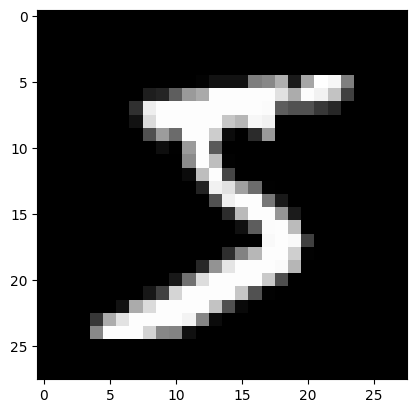

In [14]:
image, label = dataset[0]
plt.imshow(image, cmap ='gray')
print(f'Label:{label}')

In [20]:
dataset = MNIST(root= 'MNIST_data/', train = True, transform = transforms.ToTensor())

In [21]:
img_tensor,label = dataset[0]

In [24]:
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [26]:
print(img_tensor[:, 10:15, 10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


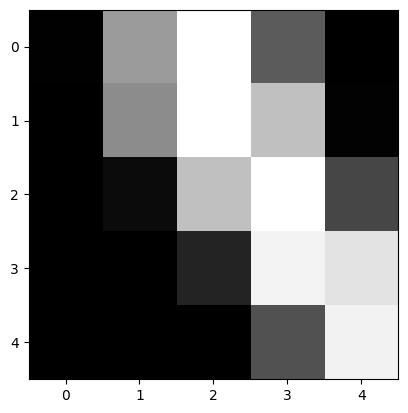

In [28]:
plt.imshow(img_tensor[0,10:15,10:15], cmap = 'gray')

In [29]:
import numpy as np

In [31]:
def split_indices(n, val_pct):
    n_val = int(val_pct*n)
    inxs = np.random.permutation(n)
    return inxs[n_val:],inxs[:n_val]

In [33]:
train_indices, val_indices = split_indices(len(dataset), val_pct = 0.2)

In [34]:
print(len(train_indices))

48000


In [35]:
from torch.utils.data.sampler import SubsetRandomSampler

In [36]:
from torch.utils.data.dataloader import DataLoader

In [37]:
batch_size = 100

In [46]:
train_sampler = SubsetRandomSampler (train_indices)
train_loader = DataLoader(dataset, 100, sampler = train_sampler)
val_sampler = SubsetRandomSampler (val_indices)
val_loader = DataLoader(dataset, 100, sampler = val_sampler)

In [47]:
import torch.nn as nn

In [48]:
input_size = 28*28
num_classes = 10

In [49]:
model = nn.Linear(input_size, num_classes)

In [50]:
model.weight.shape

torch.Size([10, 784])

In [51]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([5, 5, 1, 6, 7, 7, 2, 2, 8, 8, 1, 5, 5, 3, 9, 1, 8, 8, 4, 1, 5, 9, 7, 7,
        6, 4, 8, 3, 8, 9, 1, 7, 4, 8, 8, 9, 1, 2, 7, 1, 1, 2, 4, 7, 8, 7, 6, 9,
        6, 1, 7, 8, 5, 3, 8, 2, 3, 9, 9, 9, 4, 9, 6, 6, 0, 5, 1, 1, 5, 9, 6, 7,
        7, 5, 9, 1, 1, 0, 8, 2, 9, 5, 3, 4, 3, 5, 9, 4, 8, 3, 8, 8, 0, 6, 4, 7,
        4, 2, 8, 6])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [52]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
model = MnistModel()

In [86]:
for images, labels in train_loader:
    outputs = model.forward(images)
    break
print(outputs.shape)
print(outputs[:2].data)

torch.Size([100, 10])
tensor([[-0.3635, -0.0625,  0.2335, -0.1041,  0.0961,  0.0578,  0.1431, -0.1419,
         -0.1141, -0.2616],
        [ 0.0565, -0.2274,  0.1407, -0.1130, -0.0870, -0.0154,  0.2014, -0.1338,
         -0.1398, -0.1425]])


In [87]:
import torch.nn.functional as F

In [88]:
probs = F.softmax(outputs, dim = 1)
print(torch.sum(probs[2]).item())

0.9999998807907104


In [89]:
max_probs, preds= torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([2, 6, 0, 4, 0, 2, 7, 0, 7, 6, 2, 6, 0, 4, 2, 6, 1, 4, 6, 2, 2, 3, 2, 1,
        6, 0, 6, 6, 5, 3, 2, 6, 6, 2, 0, 2, 6, 7, 7, 7, 2, 3, 0, 4, 2, 2, 2, 6,
        2, 2, 2, 4, 0, 2, 6, 0, 2, 3, 2, 4, 2, 0, 2, 3, 2, 2, 2, 5, 5, 0, 2, 2,
        4, 0, 6, 1, 6, 2, 7, 4, 7, 7, 7, 2, 6, 2, 2, 6, 3, 2, 0, 6, 2, 2, 6, 6,
        2, 4, 6, 4])
tensor([0.1310, 0.1269, 0.1427, 0.1190, 0.1434, 0.1418, 0.1408, 0.1208, 0.1242,
        0.1356, 0.1374, 0.1259, 0.1202, 0.1347, 0.1157, 0.1406, 0.1168, 0.1322,
        0.1200, 0.1251, 0.1405, 0.1252, 0.1318, 0.1221, 0.1343, 0.1193, 0.1369,
        0.1230, 0.1287, 0.1356, 0.1318, 0.1340, 0.1181, 0.1356, 0.1444, 0.1143,
        0.1285, 0.1392, 0.1259, 0.1550, 0.1304, 0.1745, 0.1312, 0.1117, 0.1202,
        0.1206, 0.1368, 0.1408, 0.1401, 0.1334, 0.1404, 0.1224, 0.1641, 0.1321,
        0.1255, 0.1246, 0.1202, 0.1303, 0.1528, 0.1283, 0.1409, 0.1281, 0.1452,
        0.1404, 0.1251, 0.1451, 0.1171, 0.1119, 0.1293, 0.1504, 0.1393, 0.1495,
        0.1287, 0.1

In [91]:
torch.sum(labels == preds).item() /len(labels)

0.1

In [92]:
def accuracy(l1, l2):
    return torch.sum(l1==l2).item()/len(labels)

In [93]:
accuracy(labels, preds)

0.1

In [96]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [121]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    if opt:
        loss.backward()
        opt.step()
        opt.zero_grad()
    metric_result = None
    if metric:
        metric_result = metric(preds, yb)
    return loss.item(), len(xb), metric_result

In [122]:
def evaluate(model, loss_func,valid_dl, metric = None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, xb, yb, metric = metric) for xb, yb in valid_dl]
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_loss  = np.sum(np.multiply(losses,nums))/total
        avg_metric = None
        if metric:
            avg_metric= np.sum(np.multiply(metrics, nums))/total
    return avg_loss, total, avg_metric
                              

In [123]:
def accuracy(outputs, labels):
    _, preds= torch.max(outputs, dim = 1)
    return torch.sum(preds ==labels).item() / len(preds)

In [106]:
val_loss, total, val_acc  = evaluate(model, loss_fn, val_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss,  val_acc))

Loss: 2.2930, Accuracy: 0.1128


In [124]:
 def fit(epochs, model, loss_func, opt, train_dl, valid_dl, metric = None):
     for epoch in range(epochs):
         for xb, yb in train_dl:
             loss,_,_ = loss_batch(model, loss_func, xb, yb, opt)
         result = evaluate(model, loss_func, valid_dl, metric)
         val_loss, total, val_metric = result
         if not metric:
             print('Epoch[{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))
         else:
             print('Epoch[{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__,val_metric))

In [125]:
model = MnistModel()

In [126]:
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [127]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, metric = accuracy)

Epoch[1/5], Loss: 1.8915, accuracy: 0.6525
Epoch[2/5], Loss: 1.5888, accuracy: 0.7442
Epoch[3/5], Loss: 1.3758, accuracy: 0.7764
Epoch[4/5], Loss: 1.2227, accuracy: 0.7967
Epoch[5/5], Loss: 1.1091, accuracy: 0.8097


In [131]:
test_dataset = MNIST(root = 'TESTMNIST_data/', train = False, download = True, transform = transforms.ToTensor())

100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:00<00:00, 15.2MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 527kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 6.48MB/s]


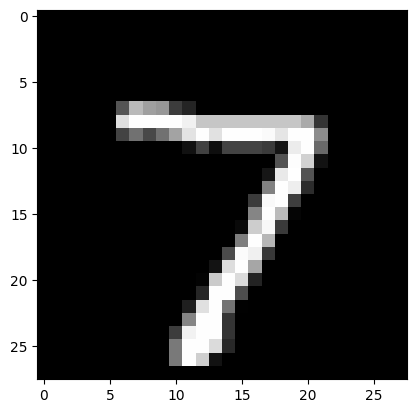

In [138]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')


In [140]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [142]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    porbs, preds = torch.max(yb, dim = 1)
    return preds[0].item()

label 7 predicted 7


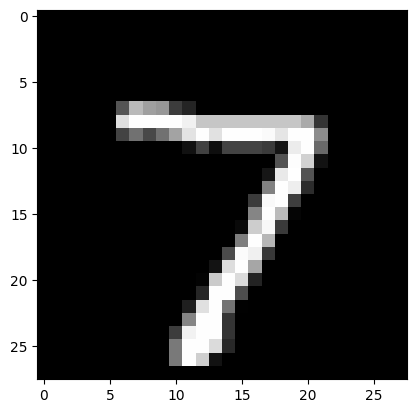

In [146]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap  = 'gray')
print('label', label, 'predicted', predict_image(img, model))


label 0 predicted 0


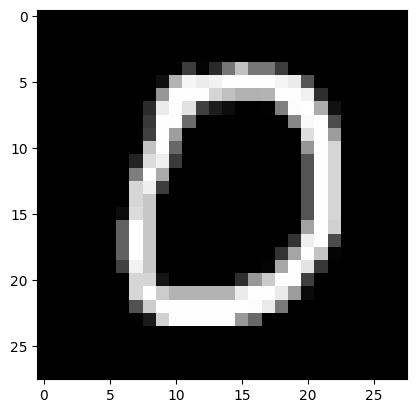

In [147]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap  = 'gray')
print('label', label, 'predicted', predict_image(img, model))

label 6 predicted 6


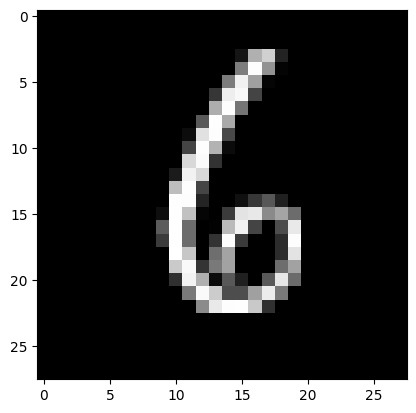

In [148]:
img, label = test_dataset[140]
plt.imshow(img[0], cmap  = 'gray')
print('label', label, 'predicted', predict_image(img, model))

label 2 predicted 2


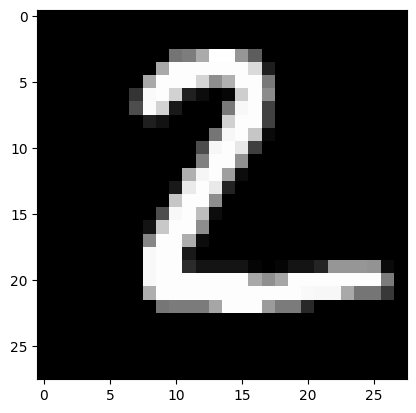

In [149]:
img, label = test_dataset[1]
plt.imshow(img[0], cmap  = 'gray')
print('label', label, 'predicted', predict_image(img, model))

label 1 predicted 1


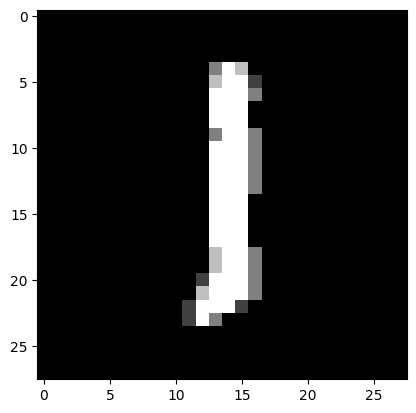

In [150]:
img, label = test_dataset[14]
plt.imshow(img[0], cmap  = 'gray')
print('label', label, 'predicted', predict_image(img, model))

In [151]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [152]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0264,  0.0333, -0.0189,  ...,  0.0105, -0.0258, -0.0291],
                      [-0.0094,  0.0122,  0.0315,  ..., -0.0069,  0.0170,  0.0029],
                      [-0.0192,  0.0201, -0.0316,  ..., -0.0127,  0.0162, -0.0156],
                      ...,
                      [-0.0161,  0.0128,  0.0195,  ...,  0.0266, -0.0342, -0.0216],
                      [-0.0308,  0.0211,  0.0288,  ...,  0.0211,  0.0040, -0.0180],
                      [ 0.0073, -0.0132,  0.0055,  ...,  0.0038,  0.0240,  0.0173]])),
             ('linear.bias',
              tensor([-0.0596,  0.0423, -0.0115,  0.0086,  0.0108,  0.0272,  0.0183,  0.0509,
                      -0.0292,  0.0271]))])

In [156]:
model12 = MnistModel()
model12.load_state_dict(torch.load('mnist-logistic.pth'))
model12.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0264,  0.0333, -0.0189,  ...,  0.0105, -0.0258, -0.0291],
                      [-0.0094,  0.0122,  0.0315,  ..., -0.0069,  0.0170,  0.0029],
                      [-0.0192,  0.0201, -0.0316,  ..., -0.0127,  0.0162, -0.0156],
                      ...,
                      [-0.0161,  0.0128,  0.0195,  ...,  0.0266, -0.0342, -0.0216],
                      [-0.0308,  0.0211,  0.0288,  ...,  0.0211,  0.0040, -0.0180],
                      [ 0.0073, -0.0132,  0.0055,  ...,  0.0038,  0.0240,  0.0173]])),
             ('linear.bias',
              tensor([-0.0596,  0.0423, -0.0115,  0.0086,  0.0108,  0.0272,  0.0183,  0.0509,
                      -0.0292,  0.0271]))])

In [157]:
val_loss, total, val_acc  = evaluate(model12, loss_fn, val_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss,  val_acc))

Loss: 1.1091, Accuracy: 0.8097
